# Math Behind Reinforcement Learning (Not for Dummies)

---

**RL : Agent learns to make decision by interaction with an environment, goal of agent is maximize reward overtime.**

## Basic Component :

1. Agent, Learner/decision maker.
2. Environment, Where agent operates.
3. States(s), current situation of environment.
4. Action(a), what can agent do in that state.
5. Reward(r), feedback after that action(+ or -).
6. Policy(π), strategy that agent follow to choose action.
7. Value Action, Predict how good a state, in term of future r.

---

## Markov Decision Process (MDP)

![](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Bellman-Equation.png?ssl=1)

MDP models the environment with this element:

1. State (S)
2. Action (A)
3. Transition Probabilities (P) = P(s'|s,a) : The probability of moving to state s' after taking action a in state s.
4. Reward Funtion (R) = R(s,a) : Expected reward for each state and action
5. Discount Factor (γ) : how much future rewards are worth to immediate ones (0 < γ < 1).

**The Markov Property** : The next state and reward depend only on the current state and action, not on full history.

**Goal of RL** : 

*"Find the expected value ( policy π(a|s) ) that maximizes the expected cumulative reward over time, also called the return"*

---

## Transition Probability

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VmV-tIr2e1eX24Y_0KMi5w.png)


**Transition Probability tells that :**

*"if you are in certain situation (state i) and take a certain action. whats the chance you will end up in another situation (next state i+1...)"*

or 

*"If im here and do this, how likely it is making me end up there"*

**for example.**

- you are in a terminal batoh(si) 
- taking bus (ai)
- youre likely 90% probability will go to terminal darussalam(si+1)
- and 30% in terminal ulelue(si+2).
- That 90% probability is transition probabilty p(si+1 | si,ai). 


**But why?..**

Let’s say your RL agent is a robot in a room:

- State s: robot is in the center
- Action a: move north
- New state s’:
- 80% chance: ends up one step north
- 20% chance: slips and stays in place

*"The agent needs to learn that “move north” doesn’t always succeed — this randomness is captured in p(s’|s,a)."*




----

## Return

**Random Variable :**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*FdQcldGubZNbfJRrh1GO8g.png)



**Return (Random Variable with Discounted Rate) :**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZEtDC9eBwSVsQ8_jtnuudg.png)

**Return tells that :**

*"the total reward agent gets from time t onward"*

- γ (gamma) ∈ [0, 1]
- Closer to 1 = future matters more
- Closer to 0 = only cares about immediate reward


**Why?**

*agent goal is maximize Gt, since it tells total reward agent has, and we want to maximize this reward*

**For example..**
- each coin = reward
- Gt = total coins from now until game ends
- Choise :
- stay and get 1 coin
- risk more for now and get 10 coin later
- Gt is there for decide that choise.


*"We model terms like return and value as random variables because the environment is unpredictable — the same action doesn’t always give the same result."*

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*AXQRwn5toJQXcJsBZ8HqMg.png)

---

so, when we goes from state s to next state s' by taking action a. the reward r it gets is not always the same.

*"Reward comes from an unknown distribution - random"*

instead if relying on one time reward, we compute :

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*6bnA-TulIcQDiRH_7_sBRg.png)

or

the expected reward : E[r | s, a, s’] 

*"the average of all possible rewards for that transition."*

for example ..

- at casino
- pull a lever (action a) many time
- each time, even the a is same, reward might be different. (5 coin, 10 coin, and even 0)

*'we didnt know exact reward we get next, but overtime, we can estimate'*

- on average, the lever (action a) gives me 6 coin, so thats 6 coin is our expected reward.

*'reward now and next reward in same action over time is being averaged'*

---

## State Value Function 

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IYC5S0lG7ov-surZ9wwMfg.png)

**State Value Function tells that :**

*"How good is for the agent to be in a state s, assuming it follow policy π or rule."*

or 

*"Start from state s, than Follow policy π, Then compute the expected return (Gₜ) — the sum of rewards you’ll likely get = How Good that State Is.."*

**for example ..**

**State (S):**
- S1 = Kitchen
- S2 = Living Room
- S3 = Charging Station

**Action (A):**
- A1 = Walk
- A2 = Clean
- A3 = Charge

**Reward (R):**
- Cleaning = +10
- Walking = -1
- Charging = +5


**T = 0 ...**


**State :**

- S2 (Living Room)

**Policy π :**
- 50% chance choose clean (A2)
- 50% change choose walk (A1) to kitchen (S1)


**Randomness :**
- if choose walk (A1), there is a 20% chance the robot slips and ends up Charging Station (S3)

so :

- transition (p(s'|s,a)) is not guaranteed when played.
- reward will differ depending on where it lands.


**The Question is :**

*"How good is the Living Room (S2)"*

which is :

State Value Function (Vπ(S2))


**How we determine how good a state is? :**

1. From s (s2 : Kitchen), robot follows policy π.

2. Transition Probability :
-  50% clean (A2) = (+10 reward)
-  50% walk (A1) = (random outcome) :
  
    -  80% kitchen (S1) (then can Clean (A2) next = +10 future reward)
    -  20% Charging Station (S3) (Charge (A3) = +5 reward)
   
3. Each path give different total reward (Gt).

Since Transition & Reward is uncertain or random,  we :

*"Take the average of all these possible outcomes or reward (Gt)"*

or 

*"How good the state (S) Living Room (S2) is"*

which is :

State Value Function : Vπ(S2) = E[Gₜ | s = S2]

or

*"Expected total reward from State s (S2) follow policy π"*





---

## Example.

Environment:


\begin{bmatrix}
🤖 & ⬜ & ⬜ & ⬜ & ⬜ \\
⬜ & 🕳 & ⬜ & ⬜ & 🕳 \\
⬜ & ⬜ & ⬜ & ⬜ & 🕳 \\
⬜ & ⬜ & ⬜ & ⬜ & ⬜ \\
🕳 & ⬜ & ⬜ & ⬜ & 🏁 \\
\end{bmatrix}


Keterangan:
- 🤖 = Start (1,1)
- 🕳 = Hole (jatuh = game over)
- 🏁 = Goal (finish)
- ⬜ = Safe (jalan beku)


Main Goal : Reward Tertinggi

Main Process :

1. Define State and Action (S dan A)

2. Define Reward and Transition Probabilities (R dan P(s'|s,a))

3. Value Initialization

4. Value Iteration

5. Q Value

6. Policy Extraction (Optimum Policy)


---

### State

every grid as state (5x5) then, 25 state


\begin{bmatrix}
  0 (🤖) & 1 (⬜) & 2 (⬜) & 3 (⬜) & 4 (⬜) \\
  5 (⬜) & 6 (🕳) & 7 (⬜) & 8 (⬜) & 9 (🕳) \\
 10 (⬜) & 11 (⬜) & 12 (⬜) & 13 (⬜) & 14 (🕳) \\
 15 (⬜) & 16 (⬜) & 17 (⬜) & 18 (⬜) & 19 (⬜) \\
 20 (🕳) & 21 (⬜) & 22 (⬜) & 23 (⬜) & 24 (🏁) \\
\end{bmatrix}

State :

- Start: state 0 (1,1)
- Goal: state 24 (5,5)
- Holes: state 6 (2,2), 9 (2,5), 14 (3,5), 20 (5,1)
- Else : Common

### Action

Move :

- Up (U)
- Down (D)
- Left (L)
- Right (R)

Probability every action :

- Success to that direction
- Fail end end up to wrong direction (Assume Slippery)



---

### Rewards :

> Assume Environtment not Slippery so every action is deterministik (can we control)

Reward :
- Reward = 1 if reach the goal S24(5,5)
- Reward = 0 for common move (State Common)
- Reward = 0 or -1 if enter holes (for now 0)

### Transition Function (P(s'|s,a))

*"probability end up in s' if in s take a"*

> Assume Environtment not Slippery so every action is deterministik (can we control)

In [7]:
import pandas as pd

actions = ['up', 'down', 'left', 'right']

def index_to_coords(index):
    return index // 5 + 1, index % 5 + 1  # row, col in 1-based index

def coords_to_index(row, col):
    return (row - 1) * 5 + (col - 1)

data = []

for state in range(25):
    row, col = index_to_coords(state)

    for action in actions:
        new_row, new_col = row, col

        if action == 'up':
            new_row -= 1
        elif action == 'down':
            new_row += 1
        elif action == 'left':
            new_col -= 1
        elif action == 'right':
            new_col += 1

        # Cek valid
        if 1 <= new_row <= 5 and 1 <= new_col <= 5:
            next_state = coords_to_index(new_row, new_col)
            next_coords = f"{next_state}({new_row},{new_col})"
        else:
            next_state = None
            next_coords = "-"

        data.append({
            'state': f"{state}({row},{col})",
            'action': action,
            'next_state': next_coords,
            'probability': 1 if next_state is not None else "-"
        })

df = pd.DataFrame(data)

df.head(10)


,state,action,next_state,probability
0,"0(1,1)",up,-,-
1,"0(1,1)",down,"5(2,1)",1
2,"0(1,1)",left,-,-
3,"0(1,1)",right,"1(1,2)",1
4,"1(1,2)",up,-,-
5,"1(1,2)",down,"6(2,2)",1
6,"1(1,2)",left,"0(1,1)",1
7,"1(1,2)",right,"2(1,3)",1
8,"2(1,3)",up,-,-
9,"2(1,3)",down,"7(2,3)",1


---

### Value Initialization

*"How Good being in That State Considering Reward that Can Get in the Future"*

Step :
1. Initialize each State (except goal and holes). (Vs = 0), reward = 0. because we didnt know future reward yet
2. S24 (Goal) (5,5) -> V(S24) = 1, reward = 1.
3. (s6, s9, s14, s20) (Holes) -> V(s) = -1, reward = -1.

In [12]:
import pandas as pd

actions = ['up', 'down', 'left', 'right']
goal_state = 24
hole_states = [6, 9, 14, 20]

def index_to_coords(index):
    return index // 5 + 1, index % 5 + 1  # row, col in 1-based index

def coords_to_index(row, col):
    return (row - 1) * 5 + (col - 1)

def get_v_value(state):
    if state == goal_state:
        return 1
    elif state in hole_states:
        return -1
    else:
        return 0

# ⬇️ TRANSITION TABLE (with action)
transition_data = []

for state in range(25):
    row, col = index_to_coords(state)

    for action in actions:
        new_row, new_col = row, col

        if action == 'up':
            new_row -= 1
        elif action == 'down':
            new_row += 1
        elif action == 'left':
            new_col -= 1
        elif action == 'right':
            new_col += 1

        if 1 <= new_row <= 5 and 1 <= new_col <= 5:
            next_state = coords_to_index(new_row, new_col)
            next_coords = f"{next_state}({new_row},{new_col})"
            prob = 1
        else:
            next_coords = "-"
            prob = "-"

        transition_data.append({
            'state': f"{state}({row},{col})",
            'action': action,
            'next_state': next_coords,
            'probability': prob
        })

df_transitions = pd.DataFrame(transition_data)

# ⬇️ VALUE FUNCTION TABLE (V(s))
v_data = []

for state in range(25):
    row, col = index_to_coords(state)
    v = get_v_value(state)

    v_data.append({
        'state': f"{state}({row},{col})",
        'V(s)': v
    })

df_v_values = pd.DataFrame(v_data)

df_v_values.tail()

,state,V(s)
20,"20(5,1)",-1
21,"21(5,2)",0
22,"22(5,3)",0
23,"23(5,4)",0
24,"24(5,5)",1


### Value Iteration

*"Update Each Values V(S) Based on Transition Funtion value we Defined Earlier"*

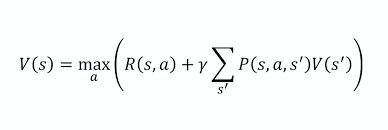

Where :

- R(s,a) : reward in state s, after taking action a. (Value initialization).
- P(s'|s,a) : Transition function , probability end up in s' if in s take a.
- V(s') : state s' value used to calculate s value.

Assuming ( gamma = 1), meaning reward now and later will be the same. short term


Iteration  : 

*"choosing the best action that maximize the V(s) each state"*

or

*"How Good being in That State Considering Reward that Can Get in the Future"*


#### First Iteration  :

*"Updating Value of a state considering each action and the reward can get, long term and short term"*

1. Start (S0) (1,1) :
- . Possible Action :
   - Rigth -> (S1) (1,2)
   - Left -> 0
   - Up -> 0
   - Down -> (S5) (2,1)

- V(S0) = R(S0,Right) + γ(P(S1|S0, Right).V(S1) + γ(P(S5|S0, Down)).V(S5)

- V(S0) = 0 + 1(1 x 0, 1 x 0) = 0


2 ..
..
.

...

#### Ninth Iteration : 

....

In [39]:
import pandas as pd
import numpy as np

# Environment setup
actions = ['up', 'down', 'left', 'right']
goal_state = 24
hole_states = [6, 9, 14, 20]
gamma = 0.9  # discount factor
theta = 1e-4  # threshold for convergence

# Mapping from index to coordinates
def index_to_coords(index):
    return index // 5 + 1, index % 5 + 1  # (row, col) in 1-based index

def coords_to_index(row, col):
    return (row - 1) * 5 + (col - 1)

# Transition model
def get_next_state(state, action):
    row, col = index_to_coords(state)
    if action == 'up':
        row -= 1
    elif action == 'down':
        row += 1
    elif action == 'left':
        col -= 1
    elif action == 'right':
        col += 1

    if 1 <= row <= 5 and 1 <= col <= 5:
        return coords_to_index(row, col)
    else:
        return state  # invalid move results in staying in same state

# Initialize value table
V = np.zeros(25)
V[goal_state] = 1
for hole in hole_states:
    V[hole] = -1

# Perform Value Iteration
iterations_dict = {}
iteration = 0
while True:
    delta = 0
    new_V = V.copy()
    for state in range(25):
        if state == goal_state or state in hole_states:
            continue
        values = []
        for action in actions:
            next_state = get_next_state(state, action)
            reward = 1 if next_state == goal_state else -1 if next_state in hole_states else 0
            values.append(1 * (reward + gamma * V[next_state]))  # probability = 1
        new_V[state] = max(values)
        delta = max(delta, abs(V[state] - new_V[state]))
    V = new_V
    # Store the values in a dict with state labels as rows
    row_labels = [f"S{state}({index_to_coords(state)[0]},{index_to_coords(state)[1]})" for state in range(25)]
    iterations_dict[iteration] = {label: round(V[i], 4) for i, label in enumerate(row_labels)}
    
    iteration += 1
    if delta < theta:
        break

# Convert to DataFrame
full_df = pd.DataFrame(iterations_dict)
full_df.index.name = 'State'
full_df



,0,1,2,3,4,5,6,7,8
State,,,,,,,,,
"S0(1,1)",0.0,0.00,0.000,0.0000,0.0000,0.0000,0.0000,0.9088,0.9088
"S1(1,2)",0.0,0.00,0.000,0.0000,0.0000,0.0000,1.0097,1.0097,1.0097
"S2(1,3)",0.0,0.00,0.000,0.0000,0.0000,1.1219,1.1219,1.1219,1.1219
"S3(1,4)",0.0,0.00,0.000,0.0000,1.2466,1.2466,1.2466,1.2466,1.2466
"S4(1,5)",0.0,0.00,0.000,0.0000,0.0000,1.1219,1.1219,1.1219,1.1219
"S5(2,1)",0.0,0.00,0.000,0.0000,0.0000,0.0000,1.0097,1.0097,1.0097
"S6(2,2)",-1.0,-1.00,-1.000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
"S7(2,3)",0.0,0.00,0.000,0.0000,1.2466,1.2466,1.2466,1.2466,1.2466
"S8(2,4)",0.0,0.00,0.000,1.3851,1.3851,1.3851,1.3851,1.3851,1.3851


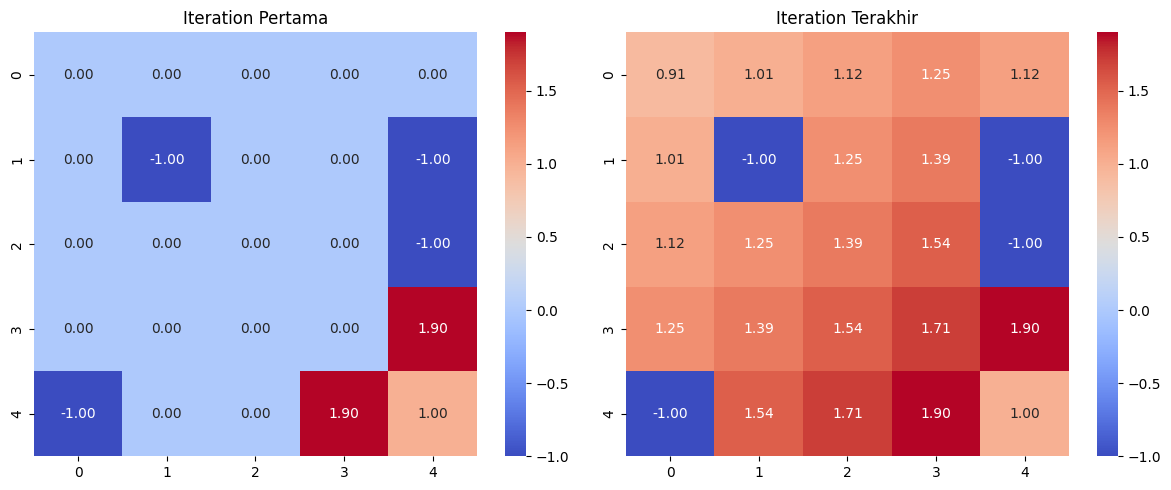

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Environment setup
actions = ['up', 'down', 'left', 'right']
goal_state = 24
hole_states = [6, 9, 14, 20]
gamma = 0.9  # discount factor
theta = 1e-4  # threshold for convergence

# Mapping from index to coordinates
def index_to_coords(index):
    return index // 5 + 1, index % 5 + 1  # (row, col) in 1-based index

def coords_to_index(row, col):
    return (row - 1) * 5 + (col - 1)

# Transition model
def get_next_state(state, action):
    row, col = index_to_coords(state)
    if action == 'up':
        row -= 1
    elif action == 'down':
        row += 1
    elif action == 'left':
        col -= 1
    elif action == 'right':
        col += 1

    if 1 <= row <= 5 and 1 <= col <= 5:
        return coords_to_index(row, col)
    else:
        return state  # invalid move results in staying in same state

# Initialize value table
V = np.zeros(25)
V[goal_state] = 1
for hole in hole_states:
    V[hole] = -1

# Perform Value Iteration
iterations_dict = {}
iteration = 0
while True:
    delta = 0
    new_V = V.copy()
    for state in range(25):
        if state == goal_state or state in hole_states:
            continue
        values = []
        for action in actions:
            next_state = get_next_state(state, action)
            reward = 1 if next_state == goal_state else -1 if next_state in hole_states else 0
            values.append(1 * (reward + gamma * V[next_state]))  # probability = 1
        new_V[state] = max(values)
        delta = max(delta, abs(V[state] - new_V[state]))
    V = new_V
    # Store the values in a dict with state labels as rows
    row_labels = [f"S{state}({index_to_coords(state)[0]},{index_to_coords(state)[1]})" for state in range(25)]
    iterations_dict[iteration] = {label: round(V[i], 4) for i, label in enumerate(row_labels)}
    
    iteration += 1
    if delta < theta:
        break

# Ambil iteration pertama dan terakhir
first_iteration_values = list(iterations_dict[0].values())
last_iteration_values = list(iterations_dict[max(iterations_dict.keys())].values())

# Ubah list menjadi grid 5x5
first_grid = np.array(first_iteration_values).reshape(5, 5)
last_grid = np.array(last_iteration_values).reshape(5, 5)

# Buat heatmap
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(first_grid, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
axes[0].set_title("Iteration Pertama")

sns.heatmap(last_grid, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Iteration Terakhir")

plt.tight_layout()
plt.show()

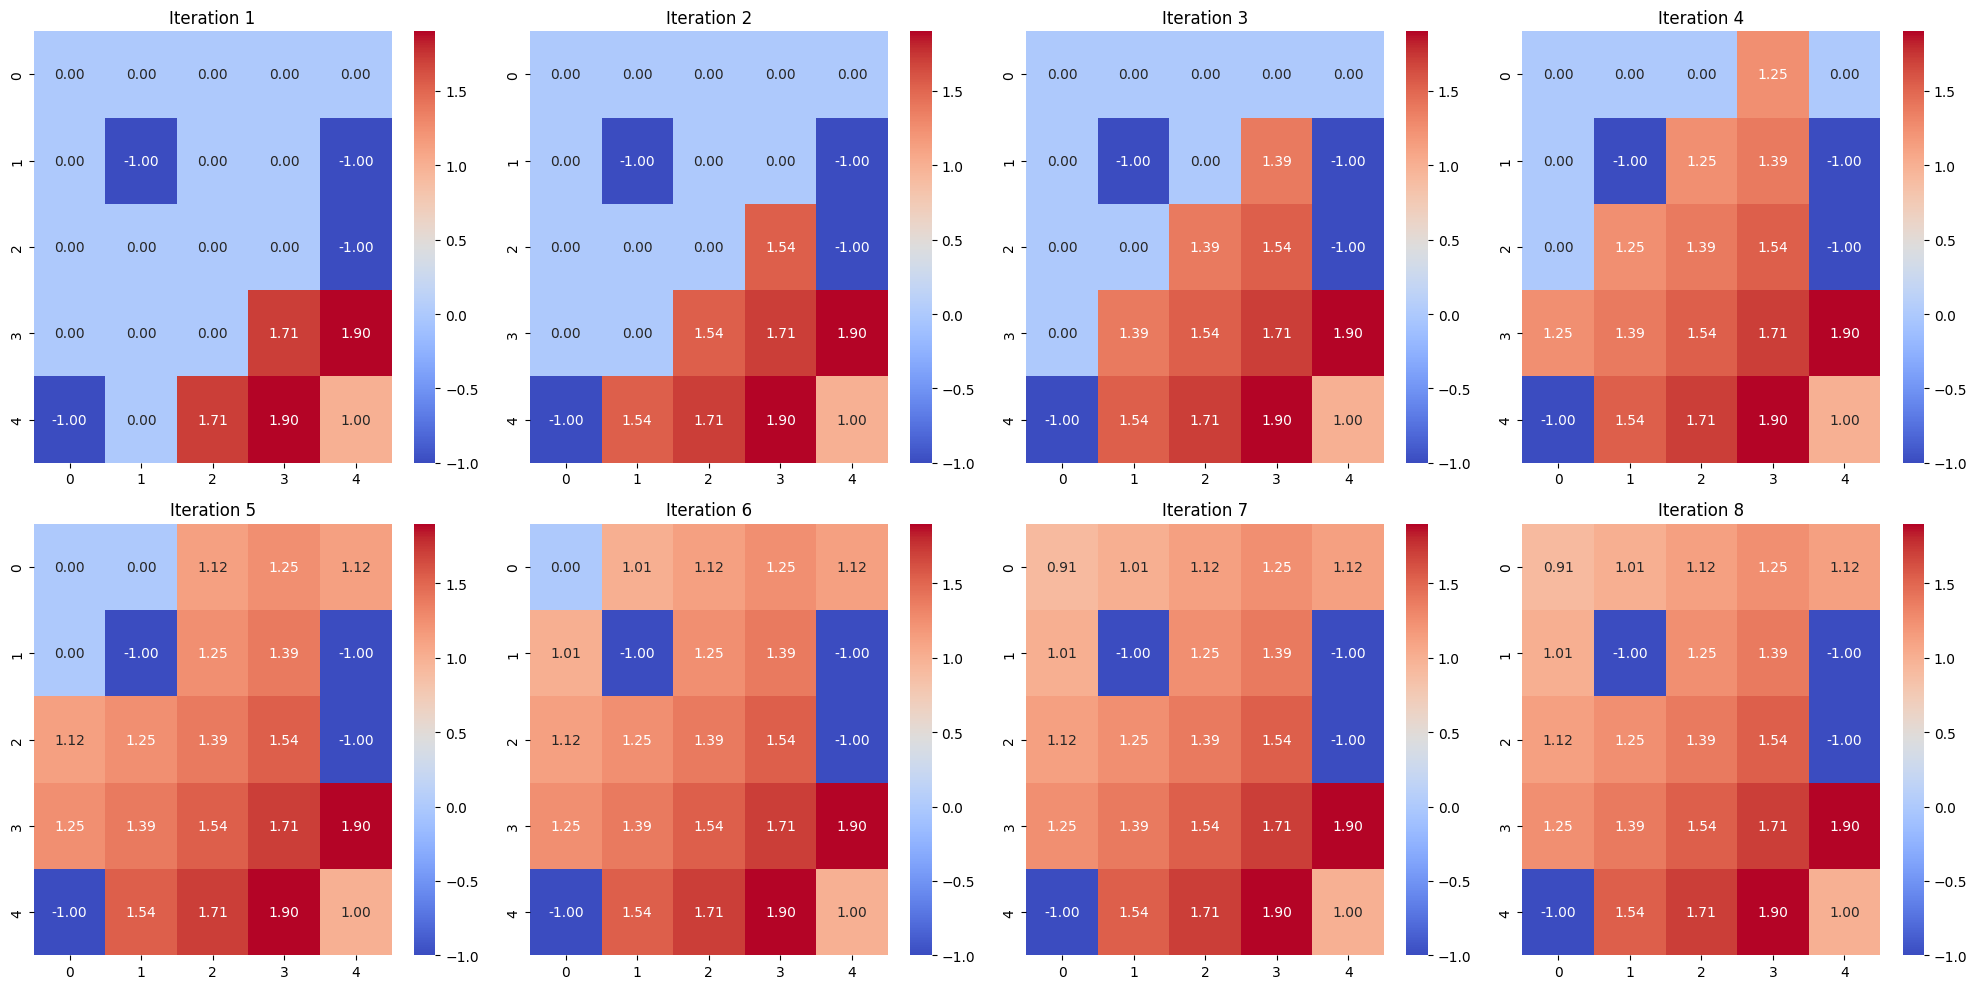

In [36]:
# Buat heatmap terpisah untuk iteration ke-2 sampai ke-8
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, iter_num in enumerate(range(1, 9)):
    iter_values = list(iterations_dict[iter_num].values())
    iter_grid = np.array(iter_values).reshape(5, 5)

    sns.heatmap(iter_grid, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"Iteration {iter_num}")

plt.tight_layout()
plt.show()

## Policy Extraction

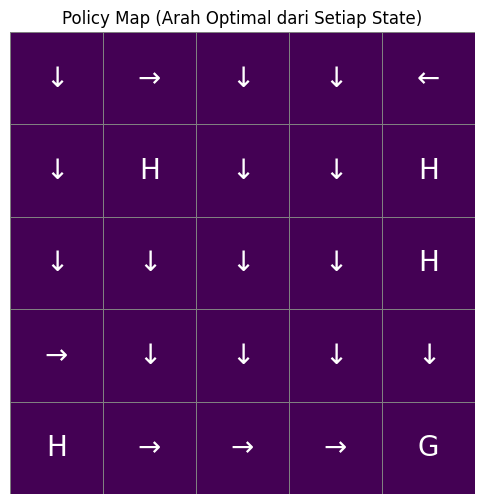

In [27]:
# Policy extraction
policy = []
directions = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}

for state in range(25):
    if state == goal_state:
        policy.append('G')
    elif state in hole_states:
        policy.append('H')
    else:
        action_values = {}
        for action in actions:
            next_state = get_next_state(state, action)
            reward = 1 if next_state == goal_state else -1 if next_state in hole_states else 0
            action_values[action] = reward + gamma * V[next_state]
        best_action = max(action_values, key=action_values.get)
        policy.append(directions[best_action])

# Ubah ke dalam grid 5x5 untuk visualisasi
policy_grid = np.array(policy).reshape(5, 5)

# Tampilkan policy map
plt.figure(figsize=(6, 6))
sns.heatmap(np.zeros((5, 5)), cbar=False, annot=policy_grid, fmt='', 
            annot_kws={"size": 20}, linewidths=0.5, linecolor='gray', cmap='viridis')
plt.title("Policy Map (Arah Optimal dari Setiap State)")
plt.axis('off')
plt.show()